In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas
# import newspaper

In [2]:
def improt_data(lujing,code):
    data = pd.read_excel(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
        name = data_['订单号']
        list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单号'].count()
        dict_ = {}
    
        if sum_ > 1 :
            list__.append(b)
            dict_ = {b:sum_}
            list_sum.append(dict_)
        else:
            list__.append(b)
            dict_ = {b:sum_}
            list_sum_.append(dict_)
        i = i + 1  
    k = [list_sum,list_sum_,list__]
    return k

In [5]:
lujing = r'C:/Users/Administrator/datas/Airsng/1训练模型/美团团购/教师节/教师节.xls'
code = 'utf8'
df = improt_data(lujing,code)

In [6]:
df

,日期,商品类型,商品id,商品名称,商品售卖量,商品售卖金额,曝光人数,访问人数
0,2020-09-09,团购,35825487,【网红爆款】康乃馨百合混搭花束,3,417.0,0,0
1,2020-09-09,团购,35825649,【感恩玫瑰】向日葵玫瑰鲜花花束,2,298.0,0,0
2,2020-09-09,团购,35826573,【夕颜若雪】11枝康乃馨鲜花束,2,186.0,0,0
3,2020-09-09,团购,36027541,【到店自取】单只向日葵,30,840.0,0,0
4,2020-09-10,团购,35818693,【邂逅爱情】11枝玫瑰表白花束,1,99.0,0,0
5,2020-09-10,团购,35825649,【感恩玫瑰】向日葵玫瑰鲜花花束,1,149.0,0,0
6,2020-09-10,团购,35825689,【心花怒放】玫瑰向日葵鲜花花束,1,149.0,0,0
7,2020-09-10,团购,35825981,【天缘巧合】33枝玫瑰鲜花花束,1,179.0,0,0
8,2020-09-10,团购,35826014,【满心欢喜】19枝玫瑰鲜花花束,1,139.0,0,0
9,2020-09-10,团购,35826239,【用心爱你】33枝玫瑰表白礼盒,1,229.0,0,0


In [7]:
df = df[df['商品售卖金额'] > 0]
df = df[df['商品售卖量'] >1]
df['商品售卖金额'].sum()

2676.0

In [8]:
df

,日期,商品类型,商品id,商品名称,商品售卖量,商品售卖金额,曝光人数,访问人数
0,2020-09-09,团购,35825487,【网红爆款】康乃馨百合混搭花束,3,417.0,0,0
1,2020-09-09,团购,35825649,【感恩玫瑰】向日葵玫瑰鲜花花束,2,298.0,0,0
2,2020-09-09,团购,35826573,【夕颜若雪】11枝康乃馨鲜花束,2,186.0,0,0
3,2020-09-09,团购,36027541,【到店自取】单只向日葵,30,840.0,0,0
11,2020-09-10,团购,36027541,【到店自取】单只向日葵,13,441.0,0,0
12,2020-09-10,团购,36056389,【送老师】向日葵鲜花花束,2,156.0,0,0
14,2020-09-10,团购,36396949,【开业大麦】大麦开业花篮 单个,2,338.0,0,0


In [9]:
name = df.drop_duplicates(subset='商品名称',inplace=False)
name = list(name['商品名称'])
for i in name :
    a = df[df['商品名称'] == i]
    x = a['商品售卖量'].sum()
    y = a['商品售卖金额'].sum()
    print(i)
    print(x)
    print(y)
    print('----------------')

【网红爆款】康乃馨百合混搭花束
3
417.0
----------------
【感恩玫瑰】向日葵玫瑰鲜花花束
2
298.0
----------------
【夕颜若雪】11枝康乃馨鲜花束
2
186.0
----------------
【到店自取】单只向日葵
43
1281.0
----------------
【送老师】向日葵鲜花花束
2
156.0
----------------
【开业大麦】大麦开业花篮 单个
2
338.0
----------------


In [13]:
lujing = r'C:/Users/Administrator/datas/Airsng/1训练模型/美团团购/教师节/教师节2.xls'
code = 'utf8'
df = improt_data(lujing,code)

In [14]:
df

,下单城市,订单号,下单时间,下单门店,商品名称,商品规格,商品总数,商品总额,实收金额,优惠金额,订单状态,配送方式,商家备注,配送地址,收货人/订货人,收货人/订货人电话,快递单号
0,邳州市,159971119193406760547295,2020-09-10 12:13:11,邂逅花坊鲜花(福地花苑店),【一见钟情】满天星表白花束,NaN,1,188,188.0,0.0,已完成,到店自取,NaN,NaN,NaN,13645217230,NaN
1,烟台,159965968281086240472397,2020-09-09 21:54:42,邂逅花坊鲜花(墨兰鲜花店),【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,山东省烟台市莱山区观海路346号滨州医学院(烟台校区)北门,曾同学,16678235737,NaN
2,马鞍山,159968112415701320317121,2020-09-10 03:52:04,邂逅花坊鲜花(婷雅花坊店),【如花美眷】11枝玫瑰鲜花礼盒,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,安徽省马鞍山市雨山区湖西中路北150米马鞍山师范高等专科学校-行政楼马鞍山师专行政楼202室,倪老师,13965388388,NaN
3,綦江区,159966287540815050533323,2020-09-09 22:47:55,邂逅花坊鲜花(花花世界店),【感恩玫瑰】向日葵玫瑰鲜花花束,NaN,1,149,149.0,0.0,已完成,商家配送,NaN,重庆市綦江区綦万高速綦江区通惠中学重庆市綦江区通惠中学,王慧玲,19923863635,NaN
4,蓝田县,159965119178173440710574,2020-09-09 19:33:11,邂逅花坊鲜花(七彩鲜花),【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,陕西省西安市蓝田县体育路30号蓝田县城关中学城关中学门口,李小锦,13572534014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,佳木斯,159962638445843610793818,2020-09-09 12:39:44,邂逅花坊鲜花(喜来登花卉礼品),【夕颜若雪】11枝康乃馨鲜花束,NaN,1,89,89.0,0.0,已完成,商家配送,NaN,黑龙江省前进区光华街37号佳木斯市肿瘤医院肿瘤医院3号楼南门员工通道,李文奇,13134540122,NaN
354,厦门,159961432578313330342687,2020-09-09 09:18:45,邂逅花坊鲜花(御花源),【微微一笑】11枝玫瑰表白花束,NaN,1,139,111.2,27.8,已完成,商家配送,NaN,福建省厦门市同安区美溪道环东海域思明工业园39号宇邦电力宇邦电力隔壁的41号贝特如服饰2楼办公室,尹,15980821213,NaN
355,安阳,159958919814657210249527,2020-09-09 02:19:58,艺博花艺,【送老师】到店自取小花束单个,NaN,1,29,29.0,0.0,已完成,到店自取,NaN,NaN,NaN,15515153788,NaN
356,安阳,159958929435557210466847,2020-09-09 02:21:34,艺博花艺,【送老师】到店自取小花束单个,NaN,1,29,29.0,0.0,已完成,到店自取,NaN,NaN,NaN,15515153788,NaN


In [15]:
df['下单时间'] = pd.to_datetime(df['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [16]:
df['day'] = df['下单时间'].dt.day

In [17]:
drop_du(df,'商品名称')

[[{'【如花似玉】33枝玫瑰百合花束': 2},
  {'【午后阳光】康乃馨混搭女王抱抱桶': 2},
  {' 【满心欢喜】19枝玫瑰鲜花花束': 2},
  {'【一见钟情】满天星表白花束': 7},
  {'【约会推荐】11枝玫瑰爆款花束': 2},
  {'【天缘巧合】33枝玫瑰鲜花花束': 5},
  {'【手捧星河】简约小花束': 11},
  {'【春水盈盈】21枝玫瑰鲜花花束': 3},
  {'【刻满关怀】19支玫瑰鲜花礼盒': 2},
  {'【生如夏花】向日葵玫瑰韩式花束': 41},
  {'【一生爱你】11枝玫瑰百合花束': 7},
  {'【送老师】向日葵鲜花花束': 18},
  {'【盛夏光年】33枝玫瑰花束套餐': 4},
  {'【感恩玫瑰】向日葵玫瑰鲜花花束': 20},
  {'【相思】19枝白粉混搭玫瑰手提花篮': 4},
  {'【送老师】6枝向日葵韩式鲜花': 22},
  {'【默默的爱】33枝玫瑰韩式花束': 3},
  {'【佳人才子】11枝玫瑰鲜花花束': 12},
  {' 【约会爆款】11枝玫瑰礼盒套餐': 11},
  {'【美轮美奂】9支玫瑰鲜花花束': 3},
  {'【半夏倾心】52枝玫瑰女神花束': 3},
  {'【送老师】到店自取康乃馨鲜花花束': 23},
  {'【网红爆款】康乃馨百合混搭花束': 13},
  {'【一心一意】11枝玫瑰表白礼盒': 2},
  {'到店自取-单枝向日葵': 18},
  {'【钟爱一生】11支玫瑰鲜花花束': 2},
  {'【恩情似海】玫瑰康乃馨混搭礼盒': 5},
  {'到店自取送老师单枝向日葵': 21},
  {'【夕颜若雪】11枝康乃馨鲜花束': 33},
  {'【微微一笑】11枝玫瑰表白花束': 21},
  {'【送老师】到店自取小花束单个': 30}],
 [{'【如花美眷】11枝玫瑰鲜花礼盒': 1},
  {'【宛若清风】99枝玫瑰求婚花束': 1},
  {'【一世爱人】33枝玫瑰鲜花礼盒': 1},
  {'【致女王】99枝玫瑰表白鲜花花束': 1},
  {'【蒸蒸日上】双层开业花篮 单个': 1},
  {'【百年好合】多头百合鲜花花束': 1}],
 ['【如花美眷】11枝玫瑰鲜花礼盒',
  '【宛若清风】99枝玫瑰求

In [35]:
print(df.drop_duplicates(subset='下单门店',inplace=False)['订单号'].count())
print(df.drop_duplicates(subset='商品名称',inplace=False)['订单号'].count())
print(df['订单号'].count())
print(df['实收金额'].sum())

87
37
358
39225.6


In [18]:
df_name = df['商品名称']
list_name = list(df_name)
text = jiebe(list_name)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.691 seconds.
Prefix dict has been built successfully.


In [19]:
text

[['【', '一见钟情', '】', '满天星', '表白', '花束'],
 ['【', '生如夏', '花', '】', '向日葵', '玫瑰', '韩式', '花束'],
 ['【', '如花美眷', '】', '11', '枝', '玫瑰', '鲜花', '礼盒'],
 ['【', '感恩', '玫瑰', '】', '向日葵', '玫瑰', '鲜花', '花束'],
 ['【', '生如夏', '花', '】', '向日葵', '玫瑰', '韩式', '花束'],
 ['【', '恩情', '似海', '】', '玫瑰', '康乃馨', '混', '搭', '礼盒'],
 ['【', '夕颜若雪', '】', '11', '枝', '康乃馨', '鲜花', '束'],
 ['【', '佳人才子', '】', '11', '枝', '玫瑰', '鲜花', '花束'],
 ['【', '网红', '爆款', '】', '康乃馨', '百合', '混', '搭', '花束'],
 ['【', '送', '老师', '】', '6', '枝', '向日葵', '韩式', '鲜花'],
 ['【', '生如夏', '花', '】', '向日葵', '玫瑰', '韩式', '花束'],
 ['【', '微微一笑', '】', '11', '枝', '玫瑰', '表白', '花束'],
 ['【', '生如夏', '花', '】', '向日葵', '玫瑰', '韩式', '花束'],
 ['【', '送', '老师', '】', '向日葵', '鲜花', '花束'],
 ['【', '一见钟情', '】', '满天星', '表白', '花束'],
 ['【', '感恩', '玫瑰', '】', '向日葵', '玫瑰', '鲜花', '花束'],
 ['【', '一生', '爱', '你', '】', '11', '枝', '玫瑰', '百合花', '束'],
 ['【', '夕颜若雪', '】', '11', '枝', '康乃馨', '鲜花', '束'],
 ['【', '微微一笑', '】', '11', '枝', '玫瑰', '表白', '花束'],
 ['【', '生如夏', '花', '】', '向日葵', '玫瑰', '韩式', '花束'],
 ['【', '

In [20]:
stopwords_ = ['【','】','，','+','花束','鲜花','搭配']
text_list= clean(text,stopwords_)

In [21]:
content = ','.join(text_list)
df_content = pd.DataFrame({'content':text_list})
df_content.head()

,content
0,"一见钟情,满天星,表白"
1,"生如夏,花,向日葵,玫瑰,韩式"
2,"如花美眷,11,枝,玫瑰,礼盒"
3,"感恩,玫瑰,向日葵,玫瑰"
4,"生如夏,花,向日葵,玫瑰,韩式"


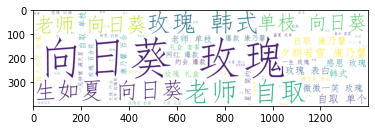

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='simfang.ttf',background_color='white',width=1400,height = 400)
wordcloud.generate(' '.join(text_list))

plt.imshow(wordcloud)

In [36]:
import jieba.analyse
# index = 1000
# 提取关键字
X = ' '.join(jieba.analyse.extract_tags(content, topK=20,withWeight=False))
tag = jieba.analyse.extract_tags(content,topK = 20,withWeight = True)
tags_list  = []
for i in tag:
    tags_list.append((i[0],i[1]))
tags_pd = pd.DataFrame(tags_list, columns=['word', 'weight'])  # 创建数据框
tags_pd

,word,weight
0,玫瑰,1.156117
1,向日葵,1.033874
2,11,0.854583
3,自取,0.738009
4,康乃馨,0.654104
5,韩式,0.619807
6,老师,0.570754
7,单枝,0.392208
8,生如夏,0.385032
9,夕颜若雪,0.309904


In [23]:
lis = ['玫瑰','康乃馨','向日葵','礼盒','11','19','33','52',]
for i  in lis:
    wenzi(df,i,'商品名称')

关于“玫瑰”的订单数量是： 158
关于“康乃馨”的订单数量是： 76
关于“向日葵”的订单数量是： 140
关于“礼盒”的订单数量是： 22
关于“11”的订单数量是： 91
关于“19”的订单数量是： 8
关于“33”的订单数量是： 15
关于“52”的订单数量是： 3


In [24]:
def drop_(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_one = {}
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['实收金额'].sum()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
            dict_one[b] = sum_
    k = [list__,dict_,dict_one]
    return k

In [25]:
dice = drop_(df,'下单门店')
dice

[['邂逅花坊鲜花(花花世界店)',
  '小城故事鲜花坊',
  '邂逅花坊鲜花(爱的花坊)',
  '邂逅花坊鲜花(花无缺)',
  '邂逅花坊鲜花(花之艺店)',
  '邂逅花坊鲜花(芳汀花店)',
  '邂逅花坊鲜花(最美时光花艺店)',
  '邂逅花坊鲜花(时尚策划店)',
  '邂逅花坊鲜花(花语鲜花)',
  '邂逅花坊鲜花(紫涵花兿)',
  '邂逅花坊鲜花(普罗旺斯婚庆)',
  '邂逅花坊鲜花(紫晶花坊)',
  '邂逅花坊鲜花(福地花苑店)',
  '缤纷花艺',
  '邂逅花坊(花藝阁店)',
  '邂逅花坊鲜花(米蘭花店)',
  '邂逅花坊鲜花(良缘婚庆鲜花)',
  '锦尚鲜花(雅韵鲜花店)',
  '倾心花艺',
  '邂逅花坊鲜花(2513鲜花店)',
  '邂逅花坊鲜花(时尚花坊)',
  '小立鲜花店(小立鲜花店（三河店）)',
  '邂逅花坊鲜花(美好鲜花)',
  '蝶恋花坊',
  '邂逅花坊鲜花(八姐店)',
  '邂逅花坊鲜花(佳美鲜花店)',
  '玫瑰鲜花香(四季馨鲜花裕华东路店)',
  '妙语花香鲜花店',
  '邂逅花坊鲜花(芳汀鲜花)',
  '邂逅花坊鲜花(花娇艳鲜花店)',
  '邂逅花坊鲜花(朝花夕拾)',
  '邂逅花坊鲜花(花之缘鲜花)',
  '佳佳花艺',
  '邂逅花坊鲜花(青青花行)',
  '窃窃花语',
  '邂逅花坊鲜花(如夏花艺)',
  '邂逅花坊鲜花(花语嫣然店)',
  '邂逅花坊鲜花(花草集)',
  '邂逅花坊鲜花(邻家花艺店)',
  '花语鲜花',
  '花语鲜花店',
  '邂逅花坊鲜花(百花派店)',
  '女主角花坊',
  '邂逅花坊鲜花(馨馨花艺店)',
  '花草当家鲜花店',
  '邂逅花坊(逍遥花店)',
  '三叶草花艺坊',
  '邂逅花坊鲜花(婷雅花坊店)',
  '邂逅花坊鲜花(馨语花坊)',
  '邂逅花坊鲜花(豆豆花卉)',
  '邂逅花坊鲜花(浪漫花都店)',
  '邂逅花坊鲜花(乙甲花艺)',
  '邂逅花坊鲜花',
  '邂逅花坊鲜花(百合花坊)',
  '邂逅花坊鲜花(同心鲜花店)',
  '邂逅花坊鲜花(雪莲花艺)',
  '邂逅花坊鲜花(百合花艺坊)',
  '邂逅花坊鲜花(四季花屋)',
  '邂逅花坊鲜花(知音婚庆鲜花店)'

In [26]:
dice_ = dice[1]
dice__ = dice[2]
dice_.update(dice__)

In [27]:
dice_

{'邂逅花坊鲜花(花花世界店)': 247.0,
 '小城故事鲜花坊': 109.0,
 '邂逅花坊鲜花(爱的花坊)': 139.0,
 '邂逅花坊鲜花(花无缺)': 39.0,
 '邂逅花坊鲜花(花之艺店)': 160.2,
 '邂逅花坊鲜花(芳汀花店)': 88.0,
 '邂逅花坊鲜花(最美时光花艺店)': 98.0,
 '邂逅花坊鲜花(时尚策划店)': 78.0,
 '邂逅花坊鲜花(花语鲜花)': 118.0,
 '邂逅花坊鲜花(紫涵花兿)': 394.0,
 '邂逅花坊鲜花(普罗旺斯婚庆)': 246.0,
 '邂逅花坊鲜花(紫晶花坊)': 287.0,
 '邂逅花坊鲜花(福地花苑店)': 276.0,
 '缤纷花艺': 206.0,
 '邂逅花坊(花藝阁店)': 197.0,
 '邂逅花坊鲜花(米蘭花店)': 238.0,
 '邂逅花坊鲜花(良缘婚庆鲜花)': 128.0,
 '锦尚鲜花(雅韵鲜花店)': 286.0,
 '倾心花艺': 52.2,
 '邂逅花坊鲜花(2513鲜花店)': 128.0,
 '邂逅花坊鲜花(时尚花坊)': 89.0,
 '小立鲜花店(小立鲜花店（三河店）)': 514.0,
 '邂逅花坊鲜花(美好鲜花)': 778.2,
 '蝶恋花坊': 128.0,
 '邂逅花坊鲜花(八姐店)': 161.2,
 '邂逅花坊鲜花(佳美鲜花店)': 167.0,
 '玫瑰鲜花香(四季馨鲜花裕华东路店)': 128.0,
 '妙语花香鲜花店': 178.0,
 '邂逅花坊鲜花(芳汀鲜花)': 139.0,
 '邂逅花坊鲜花(花娇艳鲜花店)': 139.0,
 '邂逅花坊鲜花(朝花夕拾)': 68.0,
 '邂逅花坊鲜花(花之缘鲜花)': 52.2,
 '佳佳花艺': 269.0,
 '邂逅花坊鲜花(青青花行)': 433.2,
 '窃窃花语': 371.6,
 '邂逅花坊鲜花(如夏花艺)': 109.0,
 '邂逅花坊鲜花(花语嫣然店)': 368.4,
 '邂逅花坊鲜花(花草集)': 397.4,
 '邂逅花坊鲜花(邻家花艺店)': 89.0,
 '花语鲜花': 906.4,
 '花语鲜花店': 594.0,
 '邂逅花坊鲜花(百花派店)': 731.4,
 '女主角花坊': 128.0,
 '邂逅花坊鲜花(馨馨花艺店)': 956.2,
 

In [28]:
dice_sum = pd.DataFrame(pd.Series(dice_), columns=['count'])
dice_sum = dice_sum.reset_index().rename(columns={'name':'count_'})
dice_sum = dice_sum.sort_values(by='count',ascending=False)

In [29]:
def drop_1(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_one = {}
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
            dict_one[b] = sum_
    k = [list__,dict_,dict_one]
    return k

In [30]:
dice1 = drop_1(df,'下单门店')
dice_1 = dice1[1]
dice__1 = dice1[2]
dice_.update(dice__1)
dice_1

{'邂逅花坊鲜花(花花世界店)': 2,
 '邂逅花坊鲜花(花之艺店)': 2,
 '邂逅花坊鲜花(紫涵花兿)': 3,
 '邂逅花坊鲜花(普罗旺斯婚庆)': 2,
 '邂逅花坊鲜花(紫晶花坊)': 2,
 '邂逅花坊鲜花(福地花苑店)': 2,
 '缤纷花艺': 2,
 '邂逅花坊(花藝阁店)': 2,
 '邂逅花坊鲜花(米蘭花店)': 2,
 '锦尚鲜花(雅韵鲜花店)': 2,
 '小立鲜花店(小立鲜花店（三河店）)': 4,
 '邂逅花坊鲜花(美好鲜花)': 6,
 '邂逅花坊鲜花(八姐店)': 2,
 '邂逅花坊鲜花(佳美鲜花店)': 2,
 '邂逅花坊鲜花(朝花夕拾)': 2,
 '邂逅花坊鲜花(青青花行)': 3,
 '窃窃花语': 7,
 '邂逅花坊鲜花(花语嫣然店)': 6,
 '邂逅花坊鲜花(花草集)': 5,
 '花语鲜花': 10,
 '花语鲜花店': 4,
 '邂逅花坊鲜花(百花派店)': 6,
 '邂逅花坊鲜花(馨馨花艺店)': 7,
 '花草当家鲜花店': 5,
 '邂逅花坊(逍遥花店)': 4,
 '邂逅花坊鲜花(婷雅花坊店)': 18,
 '邂逅花坊鲜花(馨语花坊)': 3,
 '邂逅花坊鲜花(豆豆花卉)': 3,
 '邂逅花坊鲜花(乙甲花艺)': 2,
 '邂逅花坊鲜花': 4,
 '邂逅花坊鲜花(百合花坊)': 2,
 '邂逅花坊鲜花(同心鲜花店)': 6,
 '邂逅花坊鲜花(雪莲花艺)': 5,
 '邂逅花坊鲜花(百合花艺坊)': 3,
 '邂逅花坊鲜花(四季花屋)': 9,
 '邂逅花坊鲜花(知音婚庆鲜花店)': 13,
 '邂逅花坊鲜花(怡尚花缘)': 4,
 '邂逅花坊鲜花(七彩鲜花)': 9,
 '花雨轩花艺': 8,
 '邂逅花坊鲜花林東花鸟鱼': 6,
 '邂逅花坊鲜花(竞花园店)': 14,
 '邂逅花坊鲜花(千艺鲜花)': 2,
 '邂逅花坊鲜花(雅景花坊)': 8,
 '邂逅花坊鲜花(欣雨花店)': 3,
 '邂逅花坊鲜花(百合花艺)': 3,
 '邂逅花坊鲜花(如意花店)': 4,
 '邂逅花坊鲜花(季盛店)': 12,
 '爱慕花艺': 3,
 '邂逅花坊鲜花(九月花舍)': 3,
 '邂逅花坊鲜花(万卉源)': 8,
 '心语花苑': 4,
 '邂逅花坊鲜花(情太子花坊)': 15,
 '邂逅花坊鲜花(温

In [31]:
dice_excel = pd.DataFrame(pd.Series(dice_1), columns=['count'])
dice_excel = dice_excel.reset_index().rename(columns={'name':'count_'})
dice_excel = dice_excel.sort_values(by='count',ascending=False)

In [32]:
data = pd.merge(dice_excel,dice_sum,on = 'index')

In [33]:
data

,index,count_x,count_y
0,邂逅花坊鲜花(婷雅花坊店),18,2426.0
1,邂逅花坊鲜花(情太子花坊),15,1611.2
2,邂逅花坊鲜花(竞花园店),14,1889.4
3,邂逅花坊鲜花(知音婚庆鲜花店),13,1707.0
4,邂逅花坊鲜花(季盛店),12,1125.6
...,...,...,...
58,邂逅花坊鲜花(米蘭花店),2,238.0
59,锦尚鲜花(雅韵鲜花店),2,286.0
60,邂逅花坊鲜花(朝花夕拾),2,68.0
61,邂逅花坊鲜花(佳美鲜花店),2,167.0


In [34]:
data.to_excel('七夕订单详情.xlsx')